<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [22]:
mean_order = sales['Order_Quantity'].mean()
median_order = sales['Order_Quantity'].median()

print("Середнє значення:", mean_order)
print("Медіана", median_order)


sales["Order_Quantity"].describe()

Середнє значення: 11.901659648253654
Медіана 10.0


count    113036.000000
mean         11.901660
std           9.561857
min           1.000000
25%           2.000000
50%          10.000000
75%          20.000000
max          32.000000
Name: Order_Quantity, dtype: float64

# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

Text(0.5, 0, 'Number of orders')

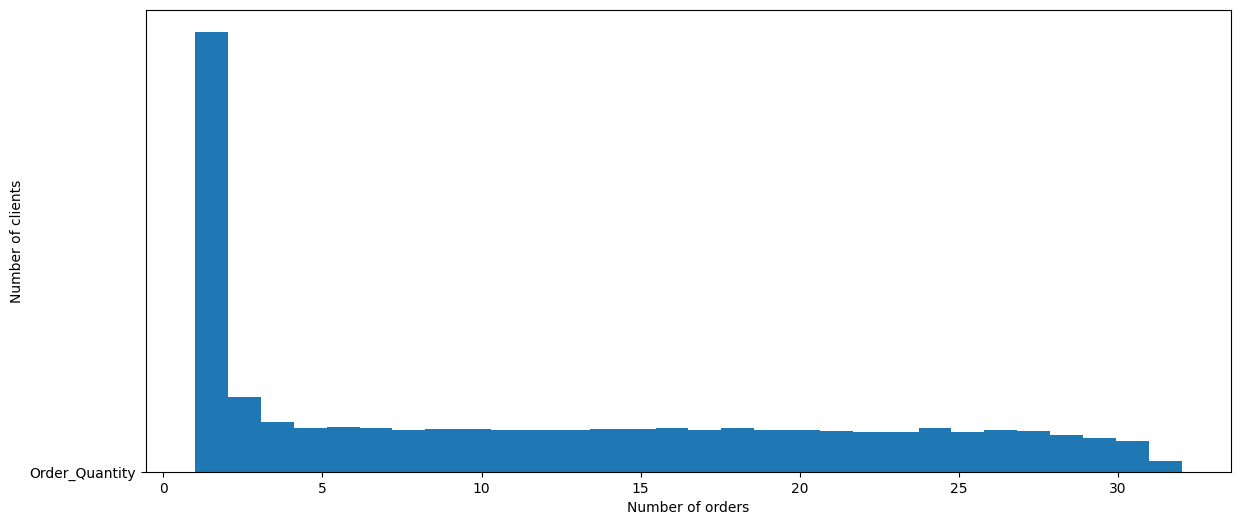

In [20]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

ax = sales["Order_Quantity"].plot(
    kind="hist",
    bins=30,
    figsize=(14, 6)

)

ax.set_ylabel('Number of clients')
ax.set_xlabel('Number of orders')

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Обчислюємо медіану `median`
3. Очислюємо значення `IQR = q3 - q1`
4. Обчислюємо `lower = q1 - 1.5*IQR`
5. Обчислюємо `upper = q3 + 1.5*IQR`
6. Викидами вважаємо значення які `< lower` або `>upper`

<Axes: >

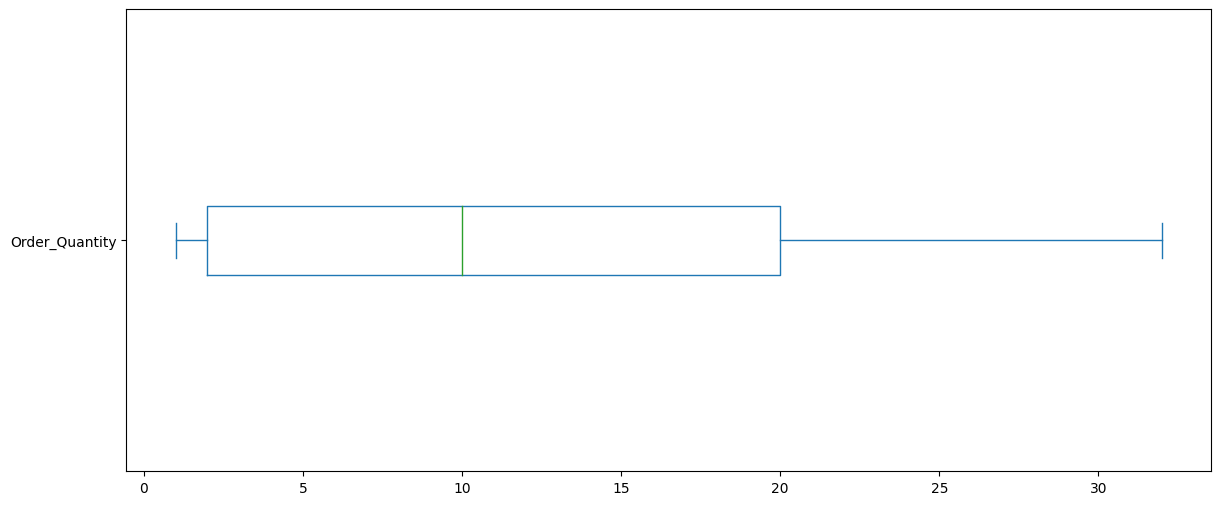

In [19]:
def remove_outliers(data, column):
  column = data[column]
  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)
  iqr = q3 - q1

  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr


  mask = (column >= lower) & (column <= upper)

  return data[mask]

new_data = sales.copy()

for column in new_data.columns:
  if new_data.dtypes[column] in ("object", "datetime64[ns]", "str"):
      continue
  new_data = remove_outliers(new_data, column)

new_data.shape

sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`